<a id='Entete'></a>
<hr style="height: 4px; color: #839D2D; width: 100%; ">

<div style="background-color: darkblue" >
    <h2 style="margin: auto; padding: 20px; color:#fff; font-family: Montserrat; ">Formation OpenClassRooms   -   Parcours DATA ANALYST</h2>
</div>


## <font color='darkblue'>Projet IX - Prédiction de la demande en Electricité (Région ARA)</font>

<a href='#mission1'><h3>Mission 1 - Data Import/Cleaning - Analyse Descriptive</h3></a>
<a href='#mission2'><h3>Mission 2 - Correction de l'effet de T° (du au chauffage) sur les données "conso mensuelles"</h3>
</a>
<a href='#mission3'><h3>Mission 3 - Désaisonnalisation (avec Moyennes Mobiles)</h3></a>
<a href='#mission4'><h3>Mission 4 - Prévisions de la Consommation</h3></a><br/>
>   * Méthode Hold-Winters
>   *  Methode SARIMA  

<br>  
<font color="darkblue" size=4><b>Les données sont issues de</b></font> :
- RTE Réseau de Transport de l'Electricité - (<a href="http://www.rte-france.com/fr/eco2mix/eco2mix-telechargement">Consommation Electrique Mensuelle</a>)  
- Cegibat (<a href="https://cegibat.grdf.fr/simulateur/calcul-dju">Données Météo DJU(correction effet T°)</a>)  

<br>  
<font color="darkblue" size=4><b>DataFrames pandas utilisés et critères de téléchargement</b></font> :
* <font color='#8A0808'>DataFrame <strong>ara</strong></font> : Consommation Electrique Mensuelle - Rhône Alpes Auvergne - Janvier 2014/Juin 2019  
1ère mise en forme avec Excel.  


* <font color='#8A0808'>DataFrame <strong>dju</strong></font> : Degré Jour Unifié

<hr style="height: 0.5px; color: blue; width: 100%; ">  
<font color='darkblue'>Date : <b>9 Septembre 2019</b>  
<br>Auteur : <b>Frédéric Boissy</b></font>  

<hr style="height: 4px; color: #839D2D; width: 100%; ">


#### Initialisation (Libraries - Functions - etc...)

In [1]:
import datetime
import time
start_time = time.time()

# -*- coding: utf8 -*-
from init_libraries import *
# /////  Pour executer des requetes SQL de verification sur des DF  /////
from pandasql            import sqldf
execsql = lambda q: sqldf(q, globals())   

#### DEBUGGER python
Ajout de ligne BKP avec commande breakpoint() à l'endroit désiré.  
* Actions autorisées : c/n/s/q
    * c - continue execution
    * n - step to the next line within the same function
    * s - step to the next line in this function or a called function
    * q - quit the debugger/execution


In [2]:
import pdb
# breakpoint()

<a id='mission1'></a>
<hr style="height: 3px; color: #839D2D; width: 100%; ">

<a href='#Entete'><h2><font color='blue'>M1 - Data Import/Cleaning - Analyse Descriptive</h2></font></a>


<hr style="height: 1px; color: #E0ECF8; width: 100%; ">

### <font color="darkblue"> Données "Consommation Electrique" $=>$ Dataframe "ara"</font>

<img src="DATA/images/RTE_data_site.png" width="700" align="left">

In [3]:
# Limiter le nombre de lignes d'affichage des Dataframes
pd.options.display.max_rows=5
# Import Données
ara = pd.read_excel("DATA/eCO2mix_RTE_energie_ARA.xlsx", sheet_name='data_ara')
# supprimer les colonnes inutiles 
ara.drop(columns=['prod_tot', 'solde_exp', 'territoire'], inplace=True)
# renommer la colonne conso_tot
ara.rename(columns={'conso_tot':'conso', 'mois':'ara_date'}, inplace=True)
# Remplacer les éventuelles valeurs Nan par des 0
ara.fillna(0)
# Ajouter une colonne annee
ara['annee'] = ara.ara_date.str[:4]
ara['mois'] = ara.ara_date.str[-2:]
ara['ara_date'] = pd.to_datetime(ara['ara_date'])
ara.sort_values(by="ara_date", ascending=True).head()
ara.info()
print(ara.shape)
# ara.describe(include="all")
ara

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
ara_date    65 non-null datetime64[ns]
conso       65 non-null int64
annee       65 non-null object
mois        65 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.2+ KB
(65, 4)


,ara_date,conso,annee,mois
0,2014-01-01,6693,2014,01
1,2014-02-01,6013,2014,02
...,...,...,...,...
63,2019-04-01,5281,2019,04
64,2019-05-01,5054,2019,05


<font color='blue'><i><b>Suppression des lignes de l'année 2013 faites en Excel</i></b></font>

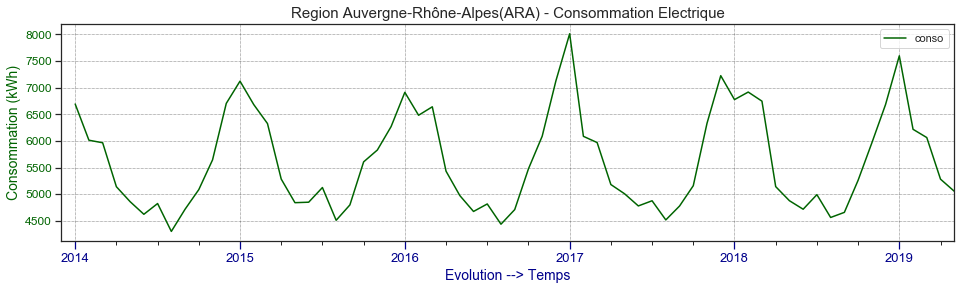

,ara_date,conso,annee,mois
0,2014-01-01,6693,2014,01
1,2014-02-01,6013,2014,02
...,...,...,...,...
63,2019-04-01,5281,2019,04
64,2019-05-01,5054,2019,05


In [4]:
ara_xlim_start = ara['ara_date'][0] - datetime.timedelta(31)
ara_xlim_end   = ara['ara_date'][len(ara)-1] + datetime.timedelta(30)
sns.set_style('ticks')
ara.plot(x="ara_date", y="conso", figsize=(16,4), color="darkgreen")
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.xlim(ara_xlim_start, ara_xlim_end)
plt.title("Region Auvergne-Rhône-Alpes(ARA) - Consommation Electrique", fontsize=15, y=1)
plt.xlabel("Evolution --> Temps", size=14, color="darkblue") 
plt.ylabel("Consommation (kWh)", color='darkgreen', size=14, rotation=90)     
plt.tick_params(axis='x', colors='darkblue', size=8)
plt.xticks(size=13, color='darkblue')
plt.yticks(size=12, color='darkgreen')
plt.savefig('OUTFILES/M1-Conso_ARA_2014_2018.png', dpi=100, bbox_inches='tight')
plt.show()
ara

####  VERIFICATION DE LA COLINEARITE DE LA CONSOMMATION en PASSANT par le LOGARITHME

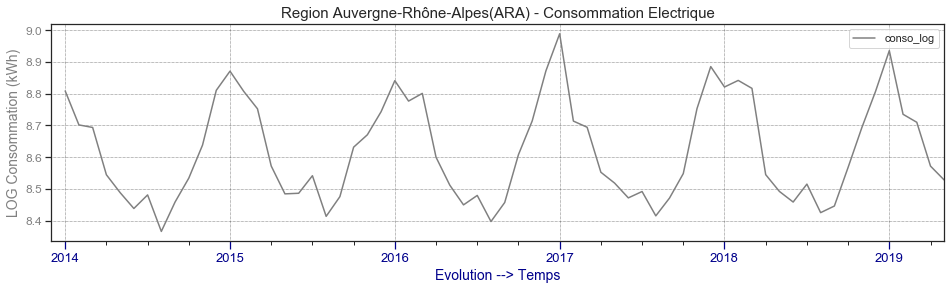

In [5]:
ara['conso_log'] = np.log(ara['conso'])
ara_xlim_start = ara['ara_date'][0] - datetime.timedelta(31)
ara_xlim_end   = ara['ara_date'][len(ara)-1] + datetime.timedelta(30)
sns.set_style('ticks')
ara.plot(x="ara_date", y='conso_log', figsize=(16,4), color="grey")
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.xlim(ara_xlim_start, ara_xlim_end)
plt.title("Region Auvergne-Rhône-Alpes(ARA) - Consommation Electrique", fontsize=15, y=1)
plt.xlabel("Evolution --> Temps", size=14, color="darkblue") 
plt.ylabel("LOG Consommation (kWh)", color='grey', size=14, rotation=90)     
plt.tick_params(axis='x', colors='darkblue', size=8)
plt.xticks(size=13, color='darkblue')
plt.yticks(size=12, color='grey')
plt.savefig('OUTFILES/M1-Conso_ARA_2014_2018.png', dpi=100, bbox_inches='tight')
plt.show()

<hr style="height: 1px; color: #E0ECF8; width: 100%; ">

### <font color="darkblue"> Données "DJU" - degré jour unifiés : Dataframe "dju"</font>

<img src="DATA/images/cegibat_params.png" width="600" align="left">

In [6]:
# Import Données
dju = pd.read_excel("DATA/dju_lyon_2012-2019.xlsx", sheet_name='data_dju')
# Remplacer les éventuelles valeurs Nan par des 0
dju.fillna(0)
# supprimer les données pour les années 2012, 2013 et pour les valeurs nulles de "dju_val"
dju.drop(dju[dju.annee == 2012].index, inplace=True)
dju.drop(dju[dju.annee == 2013].index, inplace=True)
dju['dju_date'] = pd.to_datetime(dju['dju_date'])

dju.info()
print(dju.shape)
# dju.describe(include="all")
dju.reset_index(inplace=True, drop=True)
dju

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 24 to 88
Data columns (total 4 columns):
dju_date     65 non-null datetime64[ns]
dju_value    65 non-null float64
annee        65 non-null int64
mois         65 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.5+ KB
(65, 4)


,dju_date,dju_value,annee,mois
0,2014-01-01,334.100,2014,Janv
1,2014-02-01,290.100,2014,Fevr
...,...,...,...,...
63,2019-04-01,170.400,2019,Avr
64,2019-05-01,106.600,2019,Mai


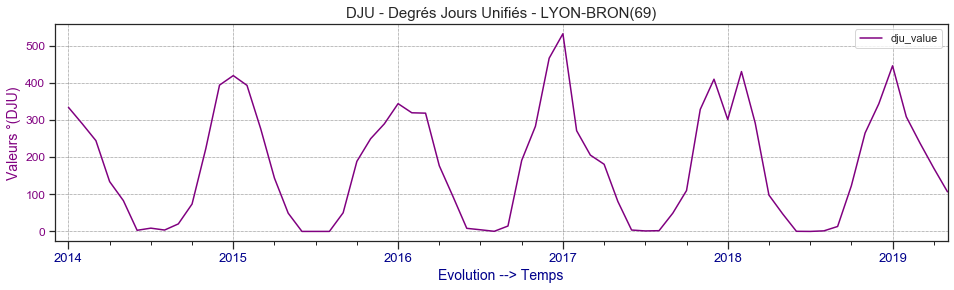

In [7]:
dju_xlim_start = dju['dju_date'][0] - datetime.timedelta(31)
dju_xlim_end   = dju['dju_date'][len(dju)-1] + datetime.timedelta(30)

sns.set_style('ticks')
dju.plot(x="dju_date", y="dju_value", figsize=(16,4), color="purple")
plt.title("DJU - Degrés Jours Unifiés - LYON-BRON(69)", fontsize=15, y=1)
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.xlim(dju_xlim_start, dju_xlim_end)
plt.xlabel("Evolution --> Temps", size=14, color='darkblue') 
plt.ylabel("Valeurs °(DJU)", color='purple', size=14, rotation=90)     
plt.tick_params(axis='x', size=8)
plt.xticks(size=13, color='darkblue')
plt.yticks(size=12, color='purple')
plt.savefig('OUTFILES/M1-DJU_Evian_ARA_2014_2018.png', dpi=100, bbox_inches='tight')
plt.show()



In [8]:
# Reset nombre de lignes d'affichage des Dataframes
pd.options.display.max_rows=6

In [9]:
ara0 = ara[['ara_date', 'conso']].set_index('ara_date').copy()
ara0.index.names = ['Date']
dju2 = dju[['dju_date', 'dju_value']].set_index('dju_date').copy()
dju2.index.names = ['Date']
y = ara0[['conso']]
ara0_sav = ara0.copy()

<a id='mission2'></a>
<hr style="height: 3px; color: #839D2D; width: 100%; ">

<a href='#Entete'><h2><font color='blue'>M2 - Correction de l'effet de T° (du au chauffage) sur les données "conso mensuelles"</h2></font></a>

Correction des données de consommation à l'aide d'une régression linéaire  
$R^2$ explique la corrélation entre les deux séries : 
> Corrélation démontrée $=> R^2 = 0,973$

Formule : $ CONSO = \alpha + \beta.DJU_{(Value)} + \epsilon_{(Residus)}$

### Fusionnons ara et dju dans un dataframe reg

In [10]:
gen = pd.merge(ara, dju[['dju_date', 'dju_value']], left_on=['ara_date'], right_on=['dju_date'], how='inner').drop_duplicates()
r2 = st.pearsonr(gen["conso"],gen["dju_value"])[0]
print("r2 = ", r2)
gen

r2 =  0.9730883398739517


,ara_date,conso,annee,mois,conso_log,dju_date,dju_value
0,2014-01-01,6693,2014,01,8.809,2014-01-01,334.100
1,2014-02-01,6013,2014,02,8.702,2014-02-01,290.100
2,2014-03-01,5965,2014,03,8.694,2014-03-01,244.400
...,...,...,...,...,...,...,...
62,2019-03-01,6063,2019,03,8.710,2019-03-01,237.600
63,2019-04-01,5281,2019,04,8.572,2019-04-01,170.400
64,2019-05-01,5054,2019,05,8.528,2019-05-01,106.600


#### Régression linéaire avec statsmodel

In [11]:
# Calcul de la droite de régression linéaire
X = dju2[['dju_value']]
Y = ara0[['conso']]
X['intercept'] = 1
reg = sm.OLS(Y, X).fit()
print(reg.summary().tables[0])
print(reg.summary().tables[1])
a, b = reg.params['dju_value'], reg.params['intercept']

                            OLS Regression Results                            
Dep. Variable:                  conso   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1123.
Date:                Thu, 21 May 2020   Prob (F-statistic):           7.12e-42
Time:                        19:45:51   Log-Likelihood:                -439.62
No. Observations:                  65   AIC:                             883.2
Df Residuals:                      63   BIC:                             887.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dju_value      5.8603      0.175     33.518      0.0

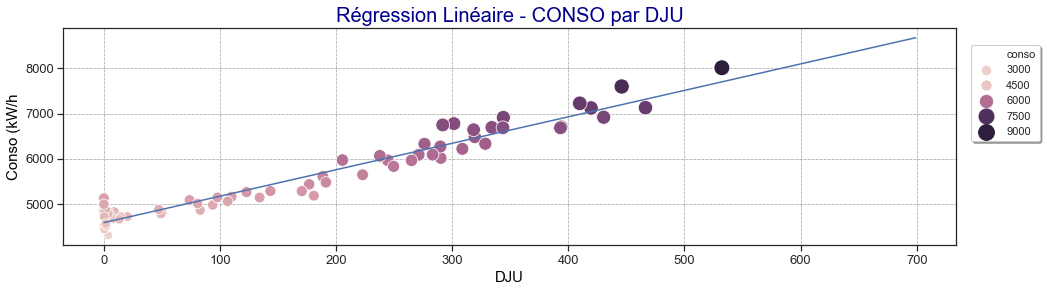

In [12]:
plt.figure(figsize=(16,4))
plt.title("Régression Linéaire - CONSO par DJU", fontsize=20, color='darkblue')

ax = sns.scatterplot(x=gen['dju_value'], y=gen['conso'], 
                size='conso', hue='conso', sizes=(75, 250), data=gen)  # palette="Set3"
ax.legend(loc='center right', bbox_to_anchor=(1.1, 0.7), ncol=1, shadow=True)
plt.xlabel("DJU", color="black", size=15)
plt.xticks(size=13)
plt.ylabel("Conso (kW/h", color="black", size=15)
plt.yticks(size=13)
plt.grid(color="black", linestyle=':', linewidth=0.5)
###  DROITE Régression linéaire
plt.plot(np.arange(0,700),[a*x+b for x in np.arange(0,700)])
plt.savefig('OUTFILES/M2-Regression_Lineaire_ARA_DJU', dpi=100, bbox_inches='tight')

plt.show()
plt.close()

#### Verif. resultat régression linéaire avec scikit-learn

In [13]:
def reglin(X,Y):
    model    = LinearRegression().fit(X, Y)
    var_expl = model.score(X, Y)
    coef     = model.coef_
    intrcpt  = model.intercept_
    predict  = model.predict(X)
    return var_expl, coef, intrcpt, predict

X = gen[['dju_value']]
Y = gen['conso'].values
var, 𝛼, 𝛽, predict = reglin(X,Y)
print("Var.Expliquée : R² = ", round(var, 4)*100, "(%)")
print("Coefficients  : 𝛼 = ", 𝛼, "  𝛽 =", 𝛽)

Var.Expliquée : R² =  94.69 (%)
Coefficients  : 𝛼 =  [5.86033664]   𝛽 = 4582.7200207488595


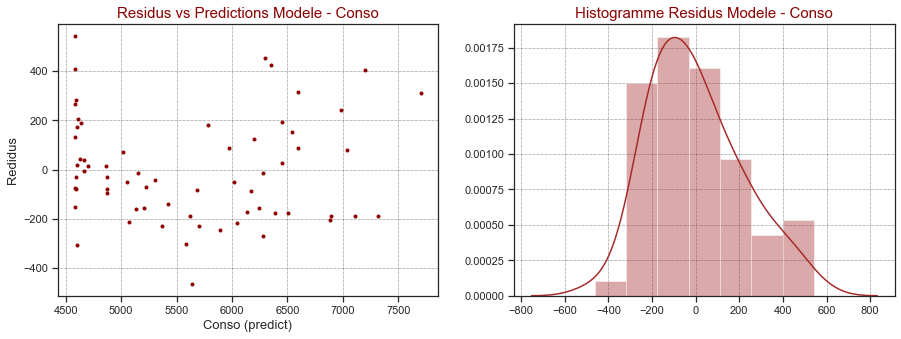

In [14]:
res_reglin = Y - np.array(reg.predict())
fig, ax = plt.subplots(figsize=[15,5])
plt.subplot(1, 2, 1)
plt.plot(predict, res_reglin,'.', color="darkred")
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.xlabel("Conso (predict)", size=13)
plt.ylabel("Redidus", size=13)
plt.title("Residus vs Predictions Modele - Conso", size=15, color="darkred")

plt.subplot(1, 2, 2)
sns.distplot(res_reglin, color='brown')
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.title("Histogramme Residus Modele - Conso", size=15, color="darkred")

plt.savefig('OUTFILES/M2-Residus_reg_lin_conso.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()


## Dataframe $ara_2 = ara_0 - dju_{eff(T°)}$

#### <font color="darkblue">Version Retrait de la valeur $\beta.DJU_{(Value)}$ dans la formule : </font>
$ CONSO = \alpha + \beta.DJU_{(Value)} + \epsilon_{(Residus)}$  


ici ARA2 = $\alpha + \epsilon_{(Residus)}$

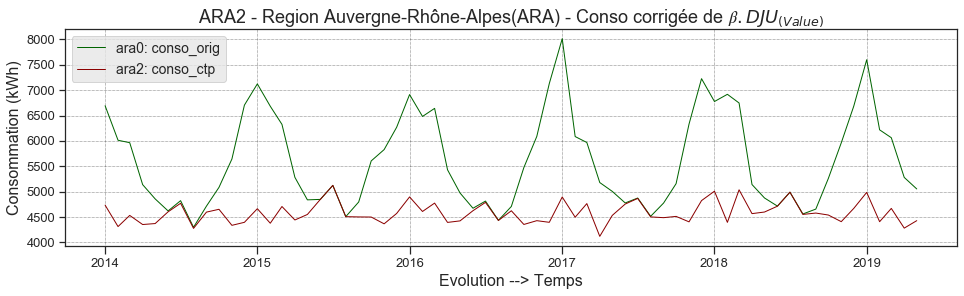

In [15]:
ara_ctp = ara0['conso'] - 𝛼*np.asarray(dju['dju_value'])
ara_ctp = ara_ctp.rename("conso_ctp")
ara2 = pd.DataFrame(ara_ctp)

sns.set_style('ticks')
plt.figure(figsize=(16,4))
plt.plot('conso', data=ara0, color="darkgreen", linewidth=1, label="ara0: conso_orig")
plt.plot('conso_ctp', data=ara2, marker='', color='darkred', linewidth=1, label="ara2: conso_ctp")
plt.ylabel("Consommation (kWh)", size=16, rotation=90)   
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.legend(loc="upper left", bbox_to_anchor=(0, 1), facecolor="#E6E6E6", fontsize=14)

plt.title("ARA2 - Region Auvergne-Rhône-Alpes(ARA) - Conso corrigée de $𝛽.DJU_{(Value)}$", fontsize=18, y=1)
plt.xlabel("Evolution --> Temps", size=16)
plt.tick_params(axis='x', size=8)
plt.xticks(size=13)
plt.yticks(size=13)
plt.savefig('OUTFILES/M2-ARA2_Conso_corrigee_Effet_T°.png', dpi=100, bbox_inches='tight')

plt.show()

<a id='mission3'></a>
<hr style="height: 3px; color: #839D2D; width: 100%; ">

<a href='#Entete'><h2><font color='blue'>M3 - Désaisonnalisation (avec Moyennes Mobiles)</font></h2></a>

<font size=4 color="darkblue">Nous sommes en présence d'une saisonnalité "mensuelle" d'ordre : $p = 12$</font>
### Objectifs
> * CONSERVER LA TENDANCE  
* ABSORBER LA SAISONNALITE  
* REDUIRE LA VARIANCE DU BRUIT

<img src="DATA/images/Exemple_Calculs_Moyennes_Mobiles.png" width="800" align="left">  

### Décomposition de la série ARA en tendance, saisonnalité et résidus
On utilise la fonction "seasonal_decompose" du package statsmodels avec un paramètre de "modèle"

<font size=4>Explications sur 2 types de modélisation <b>"déterministes"</b> :</font>  
Ces modèles relèvent de la Statistique Descriptive.  
Ils ne font intervenir que de maniè ere sous-jacente le calcul des probabilités et consistent à supposer que l’observation de  
la série à la date $t$ est une fonction du temps $t$ et d’une variable $\epsilon_t$ centréee faisant office d’erreur au modèle,  représentant la différence entre la réalité et le modèle proposé.
<br>  
Soient :  
$X_t$, la série temporelle,  
$Z_t$, la composante tendancielle,  
$S_t$, la composante saisonnière,  
$\epsilon_t$, le résidu, erreur ou écart du modèle

> <img src="DATA/images/Decomposition - Modele Additif.png" width="400" align="left">  
<u><b>MODELE ADDITIF</b></u><br><br>  
<font size=3 color="darkblue">$X_t = Z_t + S_t + \epsilon_t$</font>   
<br>
t variant de <span style="font-family: 'Wingdings 3'">&#218;</span>  t = 1 . . . à T, T+1, ....

<br><br><br><br>
> <img src="DATA/images/Decomposition - Modele Multiplicatif.png" width="400" align="left">  
<u><b>MODELE MULTIPLICATIF</b></u><br><br>  
<font size=3 color="darkblue">$X_t = Z_t(1 + S_t)(1 + \epsilon_t)$</font>   
<br>
t variant de <span style="font-family: 'Wingdings 3'">&#218;</span>  t = 1 . . . à T, T+1, ....


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_ara2_add = seasonal_decompose(ara2,  model='additive', freq=12)

 MODELE ADDITIF 


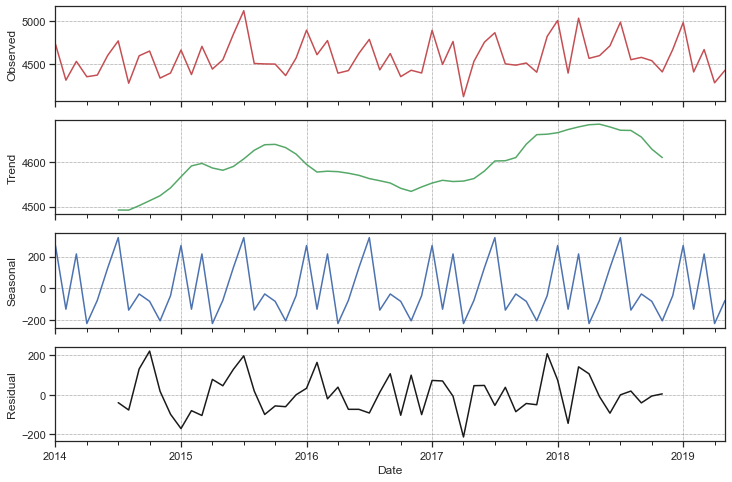

In [17]:
# on fixe la taille des figures car avec "decompose", elles sont trop petites et on sait pas régler.
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.grid']=True
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

from statsmodels.tsa.seasonal import seasonal_decompose
from colors import *

### MODELE ADDITIF
sys.stdout.write(REV_BLUE)
print(" MODELE ADDITIF ")
fig, axes = plt.subplots(4, 1, sharex=True)
decomp_ara2_add = seasonal_decompose(ara2,  model='additive', freq=12)
# decomp_ara2_add.plot()
decomp_ara2_add.observed.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Observed')
decomp_ara2_add.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
decomp_ara2_add.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomp_ara2_add.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')
plt.savefig('OUTFILES/M3-Decomposition_ara2_modele_Add', dpi=100, bbox_inches='tight')
plt.show()

ara2_trend = decomp_ara2_add.trend
ara2_seas  = decomp_ara2_add.seasonal
ara2_resid = decomp_ara2_add.resid

sys.stdout.write(RESET)

### <font color="darkblue">Après desaisonnalisation par "MA" (moving average / moyenne mobile) sur 12 mois </font>

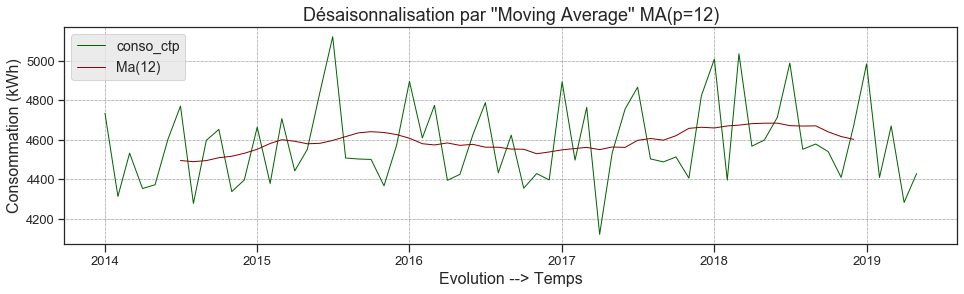

In [18]:
per=12
# Tail-rolling average transform
rolling = ara2.rolling(window=per, center=True)
ma_per = rolling.mean()


sns.set_style('ticks')
plt.figure(figsize=(16,4))
plt.plot('conso_ctp', data=ara2, color="darkgreen", linewidth=1)
plt.plot('conso_ctp', data=ma_per, marker='', color='darkred', linewidth=1, label="Ma("+str(per)+")")
plt.ylabel("Consommation (kWh)", size=16, rotation=90)   
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.legend(loc="upper left", bbox_to_anchor=(0, 1), facecolor="#E6E6E6", fontsize=14)

plt.title("Désaisonnalisation par ''Moving Average'' MA(p="+str(per)+")", fontsize=18, y=1)
plt.xlabel("Evolution --> Temps", size=16)
plt.tick_params(axis='x', size=8)
plt.xticks(size=13)
plt.yticks(size=13)
plt.savefig("OUTFILES/M3-Conso_corrigee_Effet_T°_par_MA("+str(per)+").png", dpi=100, bbox_inches='tight')

plt.show()

### <font color="darkblue">Détail de la série "Tendance" MA12 résultante  VS  Serie "trend" de fonction Decompose </font>

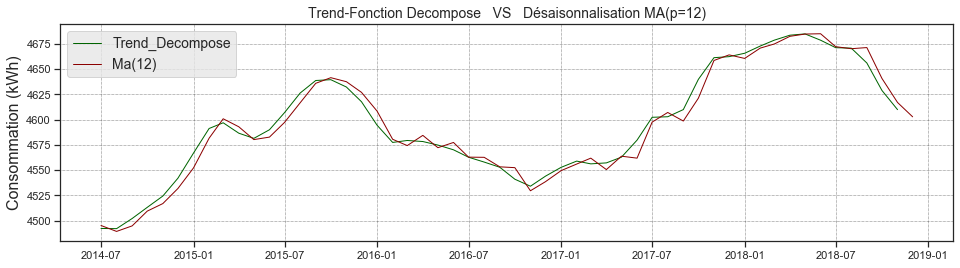

In [19]:
plt.figure(figsize=(16,4))
plt.plot('conso_ctp', data=ara2_trend, marker='', color='darkgreen', linewidth=1, label='Trend_Decompose')
plt.plot('conso_ctp', data=ma_per, marker='', color='darkred', linewidth=1, label="Ma("+str(per)+")")
plt.ylabel("Consommation (kWh)", size=16, rotation=90)   
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.title("Trend-Fonction Decompose   VS   Désaisonnalisation MA(p="+str(per)+")", fontsize=14, y=1)
plt.legend(loc="upper left", bbox_to_anchor=(0, 1), facecolor="#E6E6E6", fontsize=14)
plt.savefig("OUTFILES/M3-Trend_Fonction_Decompose_VS_MAMA("+str(per)+")", dpi=100, bbox_inches='tight')

plt.show()

Donc on estime ici que la désaisonnalisation a été efficace car on retrouve 
la décomposition de la tendance vue avec la fonction précédente (seasonal_decompose).

<hr style="height: 3px; color: #839D2D; width: 100%; ">

##  <font color='blue'>Stationnarité</font>

### Notion de "série Stationnaire"
Exemples de séries non-Stationnaires

<img src="DATA/images/Exemples_Series_Non_Stationnaires.png" width="700" align="left">  
<br><br><br><br><br><br><br><br><br><br>
### Un processus $X_t$ sera considéré (faiblement) <b><u>Stationnaire</u></b> si :  
* son Espérance(moyenne arith.) $\mu$ est constante dans le temps :   
$\mathbb{E}{(X_t)}=\mu, ∀t∈\mathbb{Z}$ 
<br><br>
* ses AutoCovariances sont constantes dans le temps :   
$∀(t, h) ∈ \mathbb{Z}, Cov(X_t, X_{t-h})$ ne dépend que de l'intervalle séparant les 2 instants $h$ , pas de l'instant $t$ 

#### Outils :
> * Test de Dickey-Fuller  
* Etude des Autocorréllations simple & partielle

<font size=4 color="darkblue">Contrôle <b>Stationnarité</b> de la série</font>  
<br>
Test de <b>Dickey-fuller</b> avec paramètres :
- ’c’ : constant only (default)
- ’ct’ : constant and trend
- ’ctt’ : constant, and linear and quadratic trend
- ’nc’ : no constant, no trend

<b>Hypothèse Nulle H0 : la série n'est pas stationnaire</b> au seuil de Risque de 1ère espèce $\alpha = 5$%

### Check Stationnarité Série corrigée ARA2   :  
Pas stationnaire $=> P_{value} = 0.138$

In [20]:
from statsmodels.tsa.stattools import adfuller
print(" > Is the ARA2 - data stationary ?")
dftest = adfuller(ara2.conso_ctp.diff().dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The Time Series AR2 data is {} stationary with {}% confidence".\
          format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the ARA2 - data stationary ?
Test statistic = -2.415
P-value = 0.138
Critical values :
	1%: -3.562878534649522 - The Time Series AR2 data is not stationary with 99% confidence
	5%: -2.918973284023669 - The Time Series AR2 data is not stationary with 95% confidence
	10%: -2.597393446745562 - The Time Series AR2 data is not stationary with 90% confidence


<font size=4 color="darkblue">ACF - Création Fonction Autocorrélation : <b>plot_sortie_acf</b>$(y_{acf}, y_{len},$ pacf=False)</font> 

In [21]:
def plot_sortie_acf(y_acf, y_len, pacf=True):
    "représentation de la sortie ACF"
    if pacf:
        y_acf = y_acf[1:]
    plt.figure(figsize=(16,4))
    plt.bar(range(len(y_acf)), y_acf, width = 0.15)
    plt.xlabel('lag')
    plt.ylabel('ACF')
    plt.axhline(y=0, color='black')
    plt.axhline(y=-1.96/np.sqrt(y_len), color='r', linestyle='--', linewidth=1)
    plt.axhline(y=1.96/np.sqrt(y_len), color='r', linestyle='--', linewidth=1)
    plt.ylim(-1, 1)
    return

<a id='mission4'></a>
<hr style="height: 3px; color: #839D2D; width: 100%; ">

<a href='#Entete'><h2><font color='blue'>Mission 4 - Prévisions de la Consommation</font></h2></a>

### Après avoir vu les modèles déterministes au préalable, voici :  

<font size=3>2 Méthodes/Modeles <b>"Stochastiques"</b>(Aléatoires)</font>

> * HOLT-WINTERS
* SARIMA ($S$easonal $A$uto$R$egressive $I$ntegrated $M$oving $A$verage)

Ils sont du même type que les modèles déterministes à ceci près que les résidus(variables de bruit $\epsilon_t$ ne sont pas <font color="darkred" size=3><b>$iid$</b></font> mais possédent une structure de corrélation non nulle :  
$\epsilon_t$ est une fonction$(f)$ des valeurs passées ($±$ lointaines suivant le modèle) et d'un terme d'erreur $\eta_t$.  

Après avoir <b>détendencialisé</b> et <b>désaisonnaliser</b> notre série originelle, on obtient donc une série aléatoire $\epsilon_t$.  
Pour les modèles stochastiques, on éspère ainsi obtenir une série <b>"stationnaire"</b>  
<br>
($iid$ = indépendants & identiquements distribués)

#### Lissage Exponentiel simple

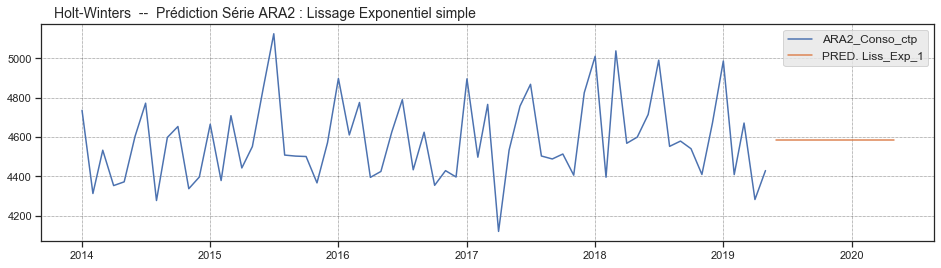

In [22]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.holtwinters import HoltWintersResults

les = ExponentialSmoothing(np.asarray(ara2['conso_ctp']), trend=None, seasonal=None).fit()
les_pred = les.forecast(12)

plt.figure(figsize=(16,4))
plt.title("Holt-Winters  --  Prédiction Série ARA2 : Lissage Exponentiel simple", fontsize=14, x=0.25, y=1)
plt.plot(ara2['conso_ctp'], label='ARA2_Conso_ctp')
plt.plot(pd.date_range(ara2.index[len(ara2)-1], periods=12, freq='M'), les_pred, label='PRED. Liss_Exp_1')
plt.legend(loc="upper right", bbox_to_anchor=(1, 1), facecolor="#E6E6E6", fontsize=12)
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.savefig('OUTFILES/M4-Holt-Winters - Lissage_Exp_simple_ARA2.png', dpi=100, bbox_inches='tight')
plt.show()

#### Lissage Exponentiel double

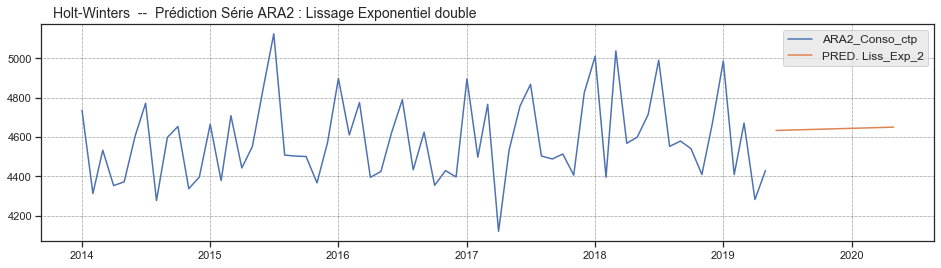

In [23]:
les = ExponentialSmoothing(np.asarray(ara2['conso_ctp']), trend='add', seasonal=None).fit()
les_pred = les.forecast(12)

plt.figure(figsize=(16,4))
plt.title("Holt-Winters  --  Prédiction Série ARA2 : Lissage Exponentiel double", fontsize=14, x=0.25, y=1)
plt.plot(ara2['conso_ctp'], label='ARA2_Conso_ctp')
plt.plot(pd.date_range(ara2.index[len(ara2)-1], periods=12, freq='M'), les_pred, label='PRED. Liss_Exp_2')
plt.legend(loc="upper right", bbox_to_anchor=(1, 1), facecolor="#E6E6E6", fontsize=12)
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.savefig('OUTFILES/M4-Holt-Winters - Lissage_Exp_double_ARA2.png', dpi=100, bbox_inches='tight')
plt.show()

### <font color="darkblue">Méthode Holt-Winters</font> sur ara2 (corr_effet_T°)

Détermination optimale de α, β et γ avec le package « exponentials smoothing » (lib. statsmodels)

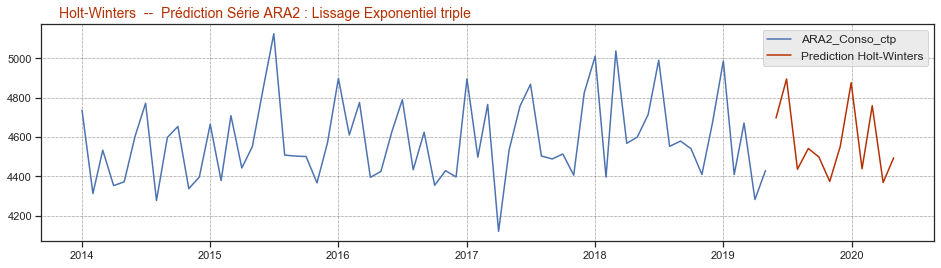

Paramètres Holt-Winters :  α =  0.25818130492762936   |  β =  9.248702387643793e-30   |  γ =  5.0378680711954057e-29


In [24]:
hw = ExponentialSmoothing(np.asarray(ara2['conso_ctp']), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(16,4))
plt.title("Holt-Winters  --  Prédiction Série ARA2 : Lissage Exponentiel triple", fontsize=14, x=0.25, y=1, color="#B43104")
plt.plot(ara2['conso_ctp'], label='ARA2_Conso_ctp')
plt.plot(pd.date_range(ara2.index[len(ara2)-1], periods=12, freq='M'), hw_pred, label='Prediction Holt-Winters', color="#B43104")
plt.legend(loc="upper right", bbox_to_anchor=(1, 1), facecolor="#E6E6E6", fontsize=12)
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.savefig('OUTFILES/M4-Pred_hw_serie_ara2_corr_effet_T.png', dpi=100, bbox_inches='tight')
plt.show()

# Récupérer Estimateurs
hw_aic   = round(hw.aic, 2)
hw_bic   = round(hw.bic, 2)
dfhw = hw.params_formatted
float(dfhw[dfhw.name == 'alpha']['param'].values)
hw_α = float(dfhw[dfhw.name == 'alpha']['param'].values)
hw_β = float(dfhw[dfhw.name == 'beta']['param'].values)
hw_γ = float(dfhw[dfhw.name == 'gamma']['param'].values)

print("Paramètres Holt-Winters :  α = ", hw_α, "  |  β = ",hw_β, "  |  γ = ",hw_γ)

In [25]:
hw.summary().tables[1]

,coeff,code,optimized
smoothing_level,0.2581813,alpha,True
smoothing_slope,9.2487e-30,beta,True
smoothing_seasonal,5.0379e-29,gamma,True
initial_level,4812.0211,l.0,True
initial_slope,1.8407488,b.0,True
initial_seasons.0,-78.319799,s.0,True
initial_seasons.1,-517.20329,s.1,True
initial_seasons.2,-198.90286,s.2,True
initial_seasons.3,-590.93263,s.3,True
initial_seasons.4,-466.90290,s.4,True


#### Test des Résidus "holt-winters" prédits avec Shapiro

In [26]:
from scipy.stats import shapiro
print("TEST Shapiro P-value = ", shapiro(hw.resid)[1])

TEST Shapiro P-value =  0.536486029624939


Ici, l'hypothèse de normalité n'est pas remise en cause (p-value = 0.46 > 0.05).

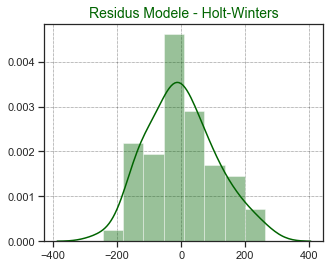

In [27]:
plt.figure(figsize=(5,4))
sns.distplot(hw.resid, color='darkgreen')
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.title("Residus Modele - Holt-Winters", size=14, color="darkgreen")
plt.savefig('OUTFILES/M4-Residus_hw_serie_ara2.png', dpi=100, bbox_inches='tight')
plt.show()

In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print("TEST Box-Ljung P-Values : ", acorr_ljungbox(hw.resid)[1])

TEST Box-Ljung P-Values :  [0.27380637 0.39498199 0.41164421 0.57841803 0.71844542 0.82167737
 0.86527406 0.90693101 0.51039712 0.47398838 0.38734718 0.21183203
 0.24510157 0.28191269 0.30267034 0.36532677 0.36885043 0.43441306
 0.49941268 0.44052516 0.30899018 0.35508998 0.32543799 0.36633383
 0.42140085 0.46042183 0.51588455 0.48463006 0.47697117 0.4589929 ]


### Controle Holt-Winters sur Entrainement 12 derniers mois VS realité

C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


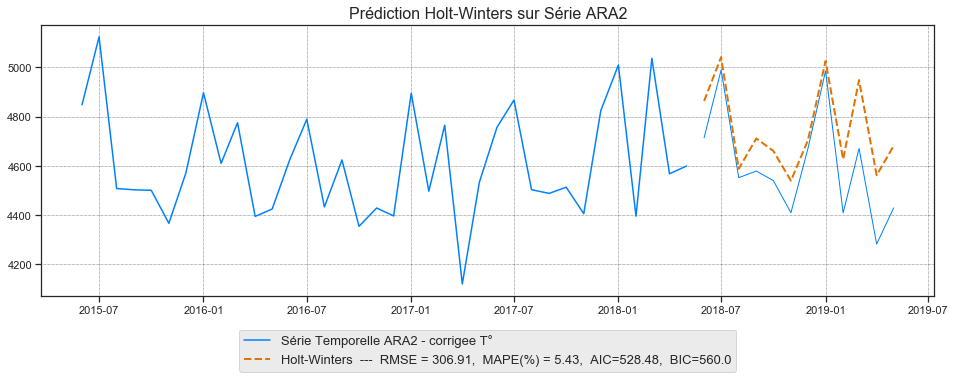

Paramètres Holt-Winters :  α =  0.19675388447197914   |  β =  4.423842869592776e-65   |  γ =  3.539074295674221e-64


In [29]:
# Split Dataset en Data Train / Test
train = ara2.iloc[:-12, :][['conso_ctp']]
test = ara2.iloc[-12:, :][['conso_ctp']]
pred = test.copy()

# Appliquer Modéle Holt-Winters sur Série "train" (-12mois mois)
hw_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
hw_fit   = hw_model.fit()
hw_pred  = hw_fit.forecast(12)

# Récupérer Estimateurs
hw_rmse  = round(np.sqrt(np.mean(np.square(test.values - hw_pred.values))), 2)
hw_mape  = round(np.mean(np.abs(1 - hw_pred.values / test.values)) * 100, 2)
hw_aic   = round(hw_fit.aic, 2)
hw_bic   = round(hw_fit.bic, 2)
dfhw = hw_fit.params_formatted
float(dfhw[dfhw.name == 'alpha']['param'].values)
hw_α = float(dfhw[dfhw.name == 'alpha']['param'].values)
hw_β = float(dfhw[dfhw.name == 'beta']['param'].values)
hw_γ = float(dfhw[dfhw.name == 'gamma']['param'].values)

# Afficher Prédiction et Résultats Estimtateurs
sns.set_style('ticks')
plt.figure(figsize=(16,5))
plt.title("Prédiction Holt-Winters sur Série ARA2", fontsize=16, y=1)
ax1 = plt.plot(train[train.index.isin(train.index[-36:])], color='#0080FF', label="Série Temporelle ARA2 - corrigee T°")
ax2 = plt.plot(ara2[ara2.index.isin(ara2.index[-12:])], color='#0080FF', linewidth=1)
ax3 = plt.plot(test.index, hw_pred, linestyle='--', color='#DF7401', linewidth=2,
         label="Holt-Winters  ---  RMSE = {},  MAPE(%) = {},  AIC={},  BIC={}".format(hw_rmse, hw_mape, hw_aic, hw_bic))
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.legend(loc="center", bbox_to_anchor=(0.5, -0.2), facecolor="#E6E6E6", fontsize=13)

plt.savefig('OUTFILES/M4-Pred_hw_serie_ara2_posteriori.png', dpi=100, bbox_inches='tight')

plt.show()
print("Paramètres Holt-Winters :  α = ", hw_α, "  |  β = ",hw_β, "  |  γ = ",hw_γ)

### Rajout des DJU retirés pour obtenir la série complète et comparer

In [30]:
djutest = dju.iloc[-12:, :]
hw_pred_ara0 = hw_pred + 𝛼*np.asarray(djutest['dju_value'])

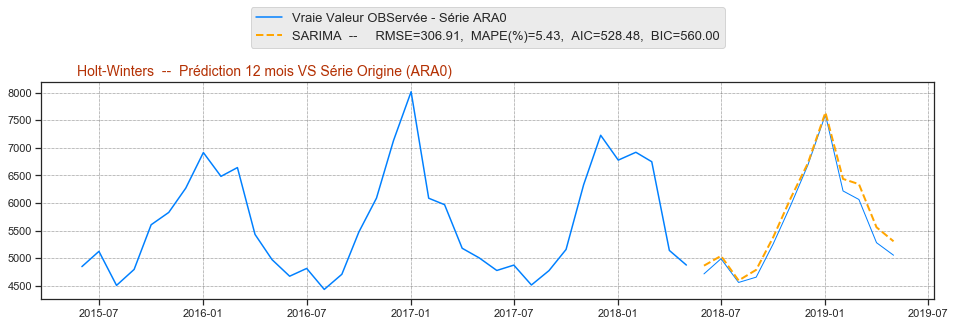

In [31]:
sns.set_style('ticks')
plt.figure(figsize=(16,4))
plt.plot(ara0[ara0.index.isin(train.index[-36:])], color='#0080FF', label="Vraie Valeur OBServée - Série ARA0")
plt.plot(ara0[ara0.index.isin(ara0.index[-12:])], color='#0080FF', linewidth=1)
plt.plot(test.index, hw_pred_ara0, linestyle='--', color='orange', linewidth=2,
         label="SARIMA  --     RMSE={:0.2f},  MAPE(%)={:0.2f},  AIC={:0.2f},  BIC={:0.2f}".
         format(hw_rmse, hw_mape, hw_aic, hw_bic))
plt.title("Holt-Winters  --  Prédiction 12 mois VS Série Origine (ARA0)", fontsize=14, x=0.25, y=1, color="#B43104")
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.legend(loc="center", bbox_to_anchor=(0.5, 1.25), facecolor="#E6E6E6", fontsize=13)
plt.savefig('OUTFILES/M4-Pred_Holtwinters_a_posteriori_ARA0_origine.png', dpi=100, bbox_inches='tight')
plt.show()

<hr style="height: 1px; color: #839D2D; width: 100%; ">


<font color="darkblue" size=5>Méthode <b>SARIMA</b></font>

PROCEDURE :

1. stationnarisation (éventuellement)
2. identification a priori de modèles potentiels
3. estimation des modèles potentiels
4. vérification des modèles potentiels
5. choix définitif d'un modèle
6. prévision à l'aide du modèle choisi
7. analyse a posteriori de la prévision

Composantes <b>Tendancielles </b> $->$ Spécification de la partie non saisonnière du modèle SARIMA:  
> Les 3 composantes $(p, d, q)$ sont : 
   - l'ordre AR $(p)$
   - le degré de différenciation $(d)$
   - et l'ordre MA $(q)$
    
Composantes <b>Saisonnières </b> $->$ Spécification de la partie saisonnière du modèle SARIMA:  
> Les 4 composantes $(P, D, Q) m$ sont : 
   - l'ordre AR saisonnier $(P)$
   - le degré de différenciation saisonnier$(D)$
   - et l'ordre MA saisonnier$(Q)$
   - le nombre de pas de "temps" pour 1 seule période saisonnière (ici $m=12$)
   

#### Afin de palier à un éventuel accroissement de la saisonnalité, il conviendrait de "passer" la série au logarithme...
Ici, a priori, pas besoin de l'effectuer au vu des graphes du début.

C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


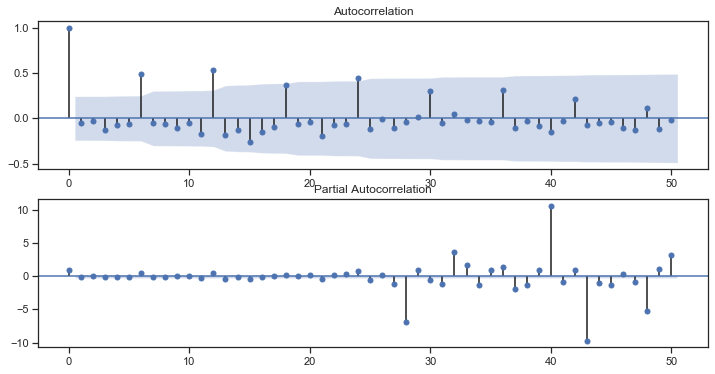

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

x = ara2
fig,ax = plt.subplots(2,1,figsize=(12,6))
fig = plot_acf(x.dropna(), lags=50, ax=ax[0])
fig = plot_pacf(x.dropna(), lags=50, ax=ax[1])
plt.savefig('OUTFILES/M4-Sarima_Autocorr_initiale_ARA2.png', dpi=100, bbox_inches='tight')
plt.show()

In [33]:
from pmdarima.arima.stationarity import ADFTest
from pmdarima.arima.utils import ndiffs
from pmdarima import AutoARIMA

# Estimate the number of differences using an ADF test:
n_adf = ndiffs(ara2, test='adf')
print("Nombre diff d = ",n_adf, "  basé sur param ADF")
# Or a KPSS test (auto_arima default):
n_kpss = ndiffs(ara2, test='kpss')
print("Nombre diff d = ",n_kpss, "  basé sur param KPSS")
# Or a PP test (auto_arima default):
n_pp = ndiffs(ara2, test='pp')
print("Nombre diff d = ",n_pp, "  basé sur param PP")

# Test whether we should difference at the alpha=0.05
# significance level
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(ara2)  # (0.01, False)
print("Test : faut-il differencier à la p_value > 5% ??  Reponse :", should_diff, " -- p_value = ", p_val)

Nombre diff d =  0   basé sur param ADF
Nombre diff d =  0   basé sur param KPSS
Nombre diff d =  0   basé sur param PP
Test : faut-il differencier à la p_value > 5% ??  Reponse : False  -- p_value =  0.01


Si ACF décroit trop lentement, il n’est pas possible que ce soit l’estimation d’un autocorrélogramme simple.
* NE peut pas être modélisé par un «ARMA» donc ne peut pas correspondre à un processus Stationnaire  


La sortie ACF présente une décroissance lente vers 0, ce qui traduit un problème de non-stationnarité.  
Au vu de l'autocorrélogramme on peut différencier avec un lag de 12  
<b>On effectue donc une Différenciation $(I−B^{12})$ .</b>

C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


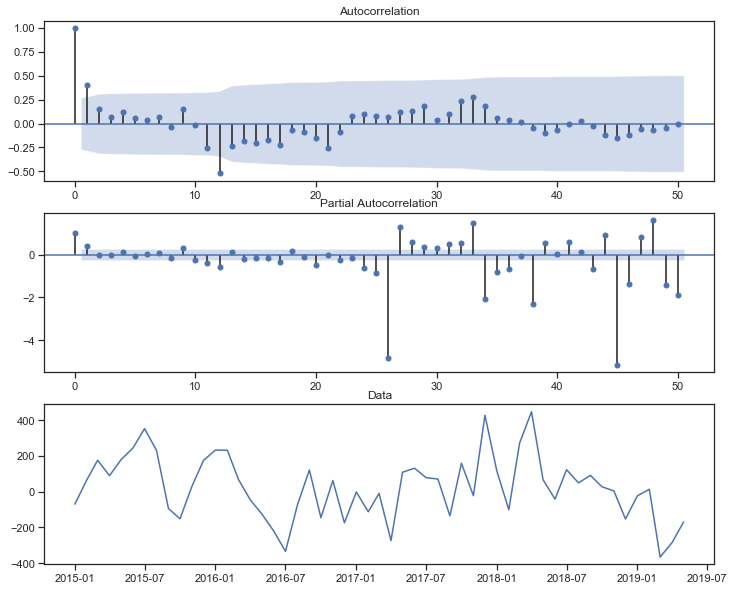

In [34]:
ara2_dif12 = ara2['conso_ctp'] - ara2['conso_ctp'].shift(12)
x = ara2_dif12
fig, ax = plt.subplots(3,1, figsize=(12,10))
ax[0] = plot_acf(x.dropna(), lags=50, ax=ax[0])
ax[1] = plot_pacf(x.dropna(), lags=50, ax=ax[1])
ax[2].plot(x)
ax[2].set_title("Data")
plt.savefig('OUTFILES/M4-Sarima_Autocorr_saison_diff_12_ARA2.png', dpi=100, bbox_inches='tight')
plt.show()

In [35]:
from pmdarima.arima.utils import nsdiffs

# estimate number of seasonal differences using an OCSB test (by default)
n_Docsb = nsdiffs(ara2, m=12, max_D=12, test='ocsb') 
print("Nombre diff D = ",n_Docsb, "  basé sur param OCSB")

Nombre diff D =  1   basé sur param OCSB


<font size=4 color="darkblue"><b>2. Identification, estimation et validation de modèles</b></font>


### d = 0  &  D = 1

### Détermination des "termes" AR et MA 
Nous savons qu'il y a reste encore des pics importants dans les autocorrélogrammes ACF et PACF.  
Il faut donc décider quels termes AR et MA ajouter.  
>Création d'un algorithme de recherche basé sur les combinaisons possibles des termes AR et MA   
Valeurs possibles pour chaque terme p,q : $[0, 2]$, car trop long sinon ...  d = 0 / D = 1

#### ESTIMATION

In [36]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Saisonnalité : ici 12 mois
s = 12
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(p, d, q))]

# d étant = 0 on retire les combinaisons ou d = 1
sarima_pdq = []
for i in range(len(pdq)):
    if pdq[i][1] == 0:
        sarima_pdq.append(pdq[i]) 
        print(pdq[i])

# D étant = 1 on retire les combinaisons ou D = 0
sarima_seasonal_pdq = []
for i in range(len(seasonal_pdq)):
    if seasonal_pdq[i][1] == 1:
        sarima_seasonal_pdq.append(seasonal_pdq[i]) 
        print(seasonal_pdq[i])

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(0, 1, 0, 12)
(0, 1, 1, 12)
(0, 1, 2, 12)
(1, 1, 0, 12)
(1, 1, 1, 12)
(1, 1, 2, 12)
(2, 1, 0, 12)
(2, 1, 1, 12)
(2, 1, 2, 12)


In [37]:
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(sarima_pdq[0], sarima_seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(sarima_pdq[3], sarima_seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(sarima_pdq[6], sarima_seasonal_pdq[6]))
print('SARIMAX: {} x {}'.format(sarima_pdq[8], sarima_seasonal_pdq[8]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 0) x (0, 1, 1, 12)
SARIMAX: (1, 0, 0) x (1, 1, 0, 12)
SARIMAX: (2, 0, 0) x (2, 1, 0, 12)
SARIMAX: (2, 0, 2) x (2, 1, 2, 12)


8 x 8  combinaisons possibles de modèles   (p,d,q)x(P,D,Q)12

#### Lors de l'exécution de différentes configurations, l'AIC le plus bas est obtenu avec 
> un modèle SARIMA(1, 0, 1) x (1, 1, 0) 12.

#### On filtre les modèles possédant des p_values < à 5% pour les coefficients du modèle p,d,q (AR, MA...)

In [38]:
sarima_time = time.time()
# Creation d'un DataFrame vide pour recupérer les resultats 
# des meilleurs estimations de paramètres de modèles SARIMA 
# selon la valeur du critère d'Akaike : AIC_value  
# Plus la valeur est faible, meilleur le modèle est.
dfsarima = pd.DataFrame()    
for param in sarima_pdq:
    for param_seasonal in sarima_seasonal_pdq:
        try:
            sarima_p1    = pd.Series(str(param))
            sarima_p2    = pd.Series(str(param_seasonal))
            mod = sm.tsa.statespace.SARIMAX(np.asarray(ara2),
                                            order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=True,enforce_invertibility=False)
            results      = mod.fit()
            ctl_pval = 'Ok'
            for i in range(len(results.pvalues)):
                if results.pvalues[i] > 0.05:
                    ctl_pval = 'Ko'
                    break
            if ctl_pval == 'Ok':
                aic_value    = pd.Series(results.aic)
                bic_value    = pd.Series(results.bic)
                ligne        = pd.concat([sarima_p1, sarima_p2, aic_value, bic_value], axis=1)
                ligne.columns = ['SARIMA_p1','SARIMA_p2','AIC_Value', 'BIC_Value']
                dfsarima     = dfsarima.append(ligne, ignore_index = True)
            print("Modèle : ", sarima_p1[0], "x", sarima_p2[0], " -- ", ctl_pval)
        except :
            continue
          
dfsarima = dfsarima.sort_values(by="AIC_Value").reset_index(drop=True)
pd.options.display.max_rows=10
# /// -------------------------------------------------------------------------------------------------------///
duree = round(time.time() - sarima_time, 5)
print("Durée du traitement :", "%s seconds" % duree)
dfsarima.head(10)

Modèle :  (0, 0, 0) x (0, 1, 0, 12)  --  Ok
Modèle :  (0, 0, 0) x (0, 1, 1, 12)  --  Ok
Modèle :  (0, 0, 0) x (1, 1, 0, 12)  --  Ok
Modèle :  (0, 0, 0) x (1, 1, 1, 12)  --  Ko
Modèle :  (0, 0, 0) x (2, 1, 0, 12)  --  Ko
Modèle :  (0, 0, 0) x (2, 1, 1, 12)  --  Ko
Modèle :  (0, 0, 1) x (0, 1, 0, 12)  --  Ok
Modèle :  (0, 0, 1) x (0, 1, 1, 12)  --  Ok
Modèle :  (0, 0, 1) x (1, 1, 0, 12)  --  Ok
Modèle :  (0, 0, 1) x (1, 1, 1, 12)  --  Ko
Modèle :  (0, 0, 1) x (2, 1, 0, 12)  --  Ko
Modèle :  (0, 0, 1) x (2, 1, 1, 12)  --  Ko
Modèle :  (0, 0, 2) x (0, 1, 0, 12)  --  Ko
Modèle :  (0, 0, 2) x (0, 1, 1, 12)  --  Ko
Modèle :  (0, 0, 2) x (1, 1, 0, 12)  --  Ko
Modèle :  (0, 0, 2) x (1, 1, 1, 12)  --  Ko
Modèle :  (0, 0, 2) x (2, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (0, 0, 2) x (2, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 0) x (0, 1, 0, 12)  --  Ok
Modèle :  (1, 0, 0) x (0, 1, 1, 12)  --  Ok
Modèle :  (1, 0, 0) x (1, 1, 0, 12)  --  Ok
Modèle :  (1, 0, 0) x (1, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 0) x (2, 1, 0, 12)  --  Ko
Modèle :  (1, 0, 0) x (2, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 1) x (0, 1, 0, 12)  --  Ko
Modèle :  (1, 0, 1) x (0, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 1) x (1, 1, 0, 12)  --  Ok


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (1, 0, 1) x (1, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 1) x (2, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (1, 0, 1) x (2, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 2) x (0, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (1, 0, 2) x (0, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 2) x (1, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (1, 0, 2) x (1, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 2) x (2, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (1, 0, 2) x (2, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 0) x (0, 1, 0, 12)  --  Ko
Modèle :  (2, 0, 0) x (0, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 0) x (1, 1, 0, 12)  --  Ko
Modèle :  (2, 0, 0) x (1, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 0) x (2, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Modèle :  (2, 0, 0) x (2, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 1) x (0, 1, 0, 12)  --  Ok


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 1) x (0, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 1) x (1, 1, 0, 12)  --  Ok


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 1) x (1, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 1) x (2, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 1) x (2, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 2) x (0, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 2) x (0, 1, 1, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 2) x (1, 1, 0, 12)  --  Ok


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 2) x (1, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 2) x (2, 1, 0, 12)  --  Ko
Modèle :  (2, 0, 2) x (2, 1, 1, 12)  --  Ko
Durée du traitement : 21.7289 seconds


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,SARIMA_p1,SARIMA_p2,AIC_Value,BIC_Value
0,"(1, 0, 1)","(1, 1, 0, 12)",684.727,692.608
1,"(1, 0, 0)","(0, 1, 1, 12)",686.527,692.438
2,"(2, 0, 2)","(1, 1, 0, 12)",687.098,698.920
3,"(1, 0, 0)","(1, 1, 0, 12)",687.200,693.111
4,"(0, 0, 1)","(0, 1, 1, 12)",687.871,693.782
5,"(0, 0, 1)","(1, 1, 0, 12)",688.395,694.306
6,"(2, 0, 1)","(1, 1, 0, 12)",689.658,699.509
7,"(0, 0, 0)","(1, 1, 0, 12)",692.390,696.330
8,"(0, 0, 0)","(0, 1, 1, 12)",693.213,697.153
9,"(1, 0, 0)","(0, 1, 0, 12)",694.804,698.744


In [39]:
pdq_parm = int(dfsarima.SARIMA_p1[0][1]), int(dfsarima.SARIMA_p1[0][4]), int(dfsarima.SARIMA_p1[0][7])
s_pdq_parm = int(dfsarima.SARIMA_p2[0][1]), int(dfsarima.SARIMA_p2[0][4]), int(dfsarima.SARIMA_p2[0][7]), \
                int(dfsarima.SARIMA_p2[0][10:12])
print("Modèle choisi :", pdq_parm, "x", s_pdq_parm)

Modèle choisi : (1, 0, 1) x (1, 1, 0, 12)


In [40]:
sarima_model1 = sm.tsa.statespace.SARIMAX(np.asarray(ara2), order=pdq_parm, seasonal_order=s_pdq_parm,
                                         enforce_stationarity=True,enforce_invertibility=False).fit()
sarima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   65
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 12)   Log Likelihood                -338.363
Date:                            Thu, 21 May 2020   AIC                            684.727
Time:                                    19:46:21   BIC                            692.608
Sample:                                         0   HQIC                           687.758
                                             - 65                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9282      0.050     18.541      0.000       0.830       1.026
ma.L1         -0.7292      0.135     -5.399      0.000      -0.994      -0.464
ar.S.L12      -0.5189      0.123     -4.205      0.000      -0.761      -0.277
sigma2      1.805e+04   3710.136      4.864      0.000    1.08e+04    2.53e+04
===================================================================================
Ljung-Box (Q):                       38.60   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.53   Prob(JB):                         0.94
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prévision à l'aide du Modèle 1 retenu

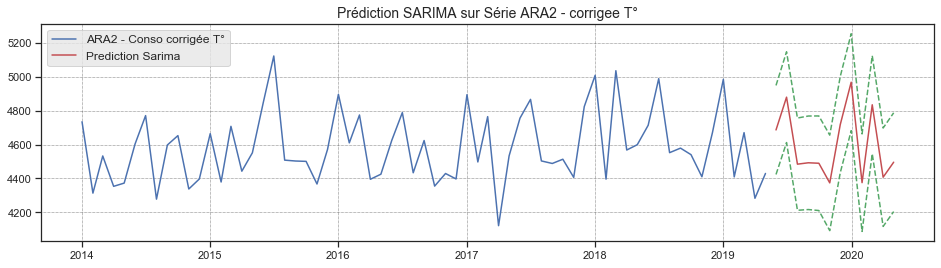

In [41]:
pred_model1 = sarima_model1.get_forecast(12)
pred = pred_model1.predicted_mean
pred_l = [(elt[0]) for elt in pred_model1.conf_int(alpha=0.05)]
pred_u = [(elt[1]) for elt in pred_model1.conf_int(alpha=0.05)]

plt.figure(figsize=(16,4))
plt.plot(ara2['conso_ctp'], label='ARA2 - Conso corrigée T°')
plt.plot(pd.date_range(ara2.index[len(ara2)-1], periods=12, freq='M'), pred, color='r', label='Prediction Sarima')
plt.plot(pd.date_range(ara2.index[len(ara2)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(ara2.index[len(ara2)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend(loc="upper left", bbox_to_anchor=(0, 1), facecolor="#E6E6E6", fontsize=12)
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.title("Prédiction SARIMA sur Série ARA2 - corrigee T°", fontsize=14, y=1)
plt.savefig('OUTFILES/M4-Pred_Sarima_serie_ara2_corrigee.png', dpi=100, bbox_inches='tight')
plt.show()

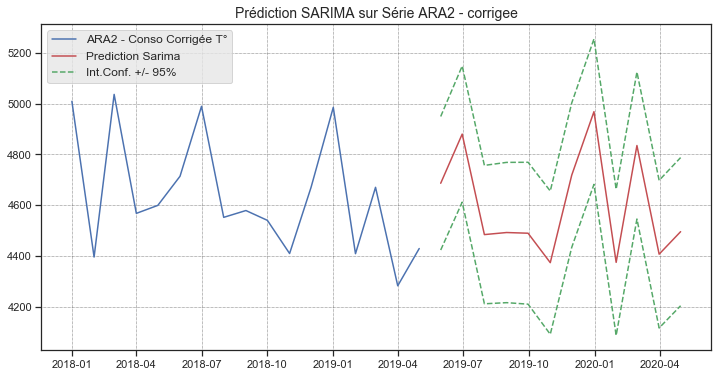

In [42]:
plt.figure(figsize=(12,6))
plt.plot(ara2['conso_ctp']['2018':], label='ARA2 - Conso Corrigée T°')
plt.plot(pd.date_range(ara0.index[len(ara0)-1], periods=12, freq='M'), pred, color='r', label='Prediction Sarima')
plt.plot(pd.date_range(ara0.index[len(ara0)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--', label="Int.Conf. +/- 95%")
plt.plot(pd.date_range(ara0.index[len(ara0)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend(loc="upper left", bbox_to_anchor=(0, 1), facecolor="#E6E6E6", fontsize=12)
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.title("Prédiction SARIMA sur Série ARA2 - corrigee", fontsize=14, y=1)
plt.savefig('OUTFILES/M4-Pred_Sarima_serie_ara2_corrigee_zoom.png', dpi=100, bbox_inches='tight')
plt.show()

Les tests de significativité des paramètres et de blancheur du résidu sont validés au niveau 5%.

Il convient de retirer les 12 premières lignes des residus de l'operation car ce ne sont pas des résidus, mais les 12 premières lignes du dataframe de l'operation.

In [43]:
sar_resid = np.delete(sarima_model1.resid, slice(0,12), axis=0)
sar_resid

array([-168.4324886 ,   39.81812112,  166.21834942,   66.43398041,
        163.55647544,  218.43249435,  304.22959508,  137.59067932,
       -193.02254857, -200.47154538,   20.81192592,  161.05245885,
         26.40268984,  102.077186  ,  -16.07479334, -159.5433083 ,
       -147.72846249, -171.98514356, -188.13094557,   48.84546493,
         65.89322642, -244.10676249,  108.56554224,  -76.59486908,
        140.73131718,   -0.39044916,   18.09295649, -309.26209018,
         94.83062646,   45.02629054,  -77.0433572 ,   63.76275144,
        -55.37436649,  110.23409871,   12.52459685,  337.76290858,
         46.93372565, -231.35611336,  246.55063206,  237.32635092,
         12.41318399,  -78.73699951,   81.7425078 ,   -6.58719426,
        -63.60726047,   44.15146524,  -77.62054357,   19.35987611,
        -13.6533941 ,  -82.52270264, -248.9153768 ,  -25.58437898,
       -104.87564433])

In [44]:
from scipy.stats import shapiro
print("TEST Shapiro P-value = ", shapiro(sar_resid)[1])

TEST Shapiro P-value =  0.8415251970291138


Le test de normalité est également validé pour ce modèle.   
Les résidus peuvent donc bien être apparentés à un bruit blanc

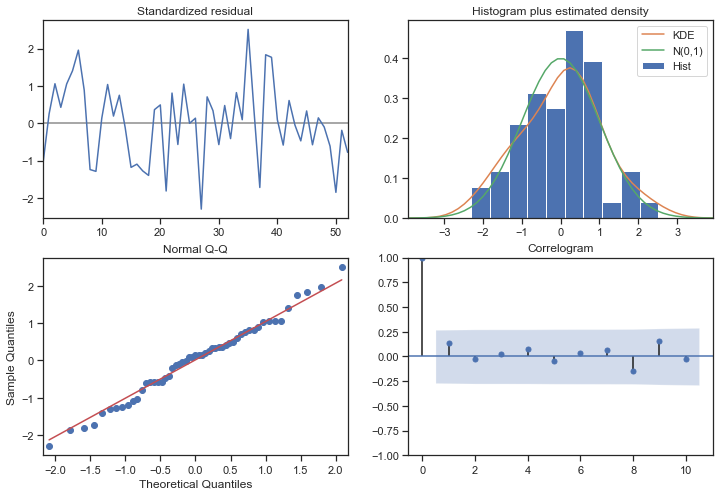

In [45]:
sarima_model1.plot_diagnostics(figsize=(12,8))
plt.savefig('OUTFILES/M4-Residus_Sarima_diagnostics_ara2.png', dpi=100, bbox_inches='tight')
plt.show()

In [46]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print("TEST Box-Ljung P-Values : ", acorr_ljungbox(sar_resid)[1])

TEST Box-Ljung P-Values :  [0.22621993 0.46967882 0.67846717 0.78192819 0.86359515 0.92676663
 0.95181823 0.93105328 0.85789555 0.90304486 0.79019983 0.63463714
 0.69083297 0.6721638  0.59331853 0.65086814 0.59267114 0.65885366
 0.71964375 0.76104914 0.73896671 0.78557514 0.81845377 0.82824287]


### Prediction a posteriori sur les 12 derniers mois de la série ARA2
Le modèle SARIMA trouvé précédemment ne convient plus à la série tronquée des 12 dernier mois.  
En refaisant tourné l'algorithme optimal on trouve le modèle suivant :  
> (1,0,1) (1,1,0)12

In [47]:
sarima_time = time.time()

train = ara2.iloc[:-12, :]
test = ara2.iloc[-12:, :]
pred = test.copy()
dfsarima = pd.DataFrame()    
for param in sarima_pdq:
    for param_seasonal in sarima_seasonal_pdq:
        try:
            sarima_p1    = pd.Series(str(param))
            sarima_p2    = pd.Series(str(param_seasonal))
            mod = sm.tsa.statespace.SARIMAX(np.asarray(train),
                                            order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=True,enforce_invertibility=False)
            results      = mod.fit()
            ctl_pval = 'Ok'
            for i in range(len(results.pvalues)):
                if results.pvalues[i] > 0.05:
                    ctl_pval = 'Ko'
                    break
            if ctl_pval == 'Ok':
                aic_value    = pd.Series(results.aic)
                bic_value    = pd.Series(results.bic)
                ligne        = pd.concat([sarima_p1, sarima_p2, aic_value, bic_value], axis=1)
                ligne.columns = ['SARIMA_p1','SARIMA_p2','AIC_Value', 'BIC_Value']
                dfsarima     = dfsarima.append(ligne, ignore_index = True)
            print("Modèle : ", sarima_p1[0], "x", sarima_p2[0], " -- ", ctl_pval)
        except :
            continue
          
dfsarima = dfsarima.sort_values(by="AIC_Value").reset_index(drop=True)
pd.options.display.max_rows=10
# /// -------------------------------------------------------------------------------------------------------///
duree = round(time.time() - sarima_time, 5)
print("Durée du traitement :", "%s seconds" % duree)
dfsarima.head(10)

Modèle :  (0, 0, 0) x (0, 1, 0, 12)  --  Ok
Modèle :  (0, 0, 0) x (0, 1, 1, 12)  --  Ok


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2059: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


Modèle :  (0, 0, 0) x (1, 1, 0, 12)  --  Ok


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\boiss\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\boiss\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\boiss\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Modèle :  (0, 0, 0) x (1, 1, 1, 12)  --  Ok
Modèle :  (0, 0, 0) x (2, 1, 0, 12)  --  Ko
Modèle :  (0, 0, 0) x (2, 1, 1, 12)  --  Ko
Modèle :  (0, 0, 1) x (0, 1, 0, 12)  --  Ok


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (0, 0, 1) x (0, 1, 1, 12)  --  Ok
Modèle :  (0, 0, 1) x (1, 1, 0, 12)  --  Ok
Modèle :  (0, 0, 1) x (1, 1, 1, 12)  --  Ko
Modèle :  (0, 0, 1) x (2, 1, 0, 12)  --  Ko
Modèle :  (0, 0, 2) x (0, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (0, 0, 2) x (0, 1, 1, 12)  --  Ko
Modèle :  (0, 0, 2) x (1, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (0, 0, 2) x (1, 1, 1, 12)  --  Ko
Modèle :  (0, 0, 2) x (2, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (0, 0, 2) x (2, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 0) x (0, 1, 0, 12)  --  Ok


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (1, 0, 0) x (0, 1, 1, 12)  --  Ok
Modèle :  (1, 0, 0) x (1, 1, 0, 12)  --  Ok


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (1, 0, 0) x (1, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 0) x (2, 1, 0, 12)  --  Ko
Modèle :  (1, 0, 1) x (0, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (1, 0, 1) x (0, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 1) x (1, 1, 0, 12)  --  Ok


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (1, 0, 1) x (1, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 1) x (2, 1, 0, 12)  --  Ko
Modèle :  (1, 0, 2) x (0, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (1, 0, 2) x (0, 1, 1, 12)  --  Ko
Modèle :  (1, 0, 2) x (1, 1, 0, 12)  --  Ko
Modèle :  (1, 0, 2) x (2, 1, 0, 12)  --  Ko
Modèle :  (1, 0, 2) x (2, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 0) x (0, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 0) x (0, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 0) x (1, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 0) x (1, 1, 1, 12)  --  Ko
Modèle :  (2, 0, 0) x (2, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 0) x (2, 1, 1, 12)  --  Ok
Modèle :  (2, 0, 1) x (0, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 1) x (0, 1, 1, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 1) x (1, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 1) x (2, 1, 0, 12)  --  Ko
Modèle :  (2, 0, 2) x (0, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 2) x (0, 1, 1, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 2) x (1, 1, 0, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 2) x (1, 1, 1, 12)  --  Ko


C:\Users\boiss\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Modèle :  (2, 0, 2) x (2, 1, 0, 12)  --  Ko
Durée du traitement : 21.62517 seconds


,SARIMA_p1,SARIMA_p2,AIC_Value,BIC_Value
0,"(1, 0, 1)","(1, 1, 0, 12)",538.579,545.434
1,"(1, 0, 0)","(1, 1, 0, 12)",540.633,545.773
2,"(0, 0, 1)","(1, 1, 0, 12)",541.384,546.525
3,"(1, 0, 0)","(0, 1, 0, 12)",542.153,545.580
4,"(0, 0, 1)","(0, 1, 0, 12)",543.102,546.529
5,"(0, 0, 0)","(1, 1, 0, 12)",544.107,547.534
6,"(0, 0, 0)","(0, 1, 0, 12)",546.503,548.216
7,"(0, 0, 0)","(1, 1, 1, 12)","2,129.626","2,134.766"
8,"(0, 0, 0)","(0, 1, 1, 12)","2,152.335","2,155.763"
9,"(1, 0, 0)","(0, 1, 1, 12)","2,154.567","2,159.707"


In [48]:
pdq_parm = int(dfsarima.SARIMA_p1[0][1]), int(dfsarima.SARIMA_p1[0][4]), int(dfsarima.SARIMA_p1[0][7])
s_pdq_parm = int(dfsarima.SARIMA_p2[0][1]), int(dfsarima.SARIMA_p2[0][4]), int(dfsarima.SARIMA_p2[0][7]), \
                int(dfsarima.SARIMA_p2[0][10:12])
print("Modèle TRAIN choisi :", pdq_parm, "x", s_pdq_parm)

Modèle TRAIN choisi : (1, 0, 1) x (1, 1, 0, 12)


In [49]:
sar_model = sm.tsa.statespace.SARIMAX(np.asarray(train), order=pdq_parm, seasonal_order=s_pdq_parm,
                                         enforce_stationarity=True,enforce_invertibility=False)
sar_fit = sar_model.fit()
pred_train_model = sar_fit.get_forecast(12)
sar_pred = pred_train_model.predicted_mean
pred_l_train = [(elt[0]) for elt in pred_train_model.conf_int(alpha=0.05)]
pred_u_train = [(elt[1]) for elt in pred_train_model.conf_int(alpha=0.05)]

In [50]:
sar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   53
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 12)   Log Likelihood                -265.290
Date:                            Thu, 21 May 2020   AIC                            538.579
Time:                                    19:46:44   BIC                            545.434
Sample:                                         0   HQIC                           541.075
                                             - 53                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9358      0.051     18.489      0.000       0.837       1.035
ma.L1         -0.7636      0.140     -5.462      0.000      -1.038      -0.490
ar.S.L12      -0.4799      0.150     -3.206      0.001      -0.773      -0.187
sigma2      2.122e+04   5524.550      3.841      0.000    1.04e+04     3.2e+04
===================================================================================
Ljung-Box (Q):                       27.75   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.93   Prob(JB):                         0.77
Heteroskedasticity (H):               1.55   Skew:                            -0.11
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

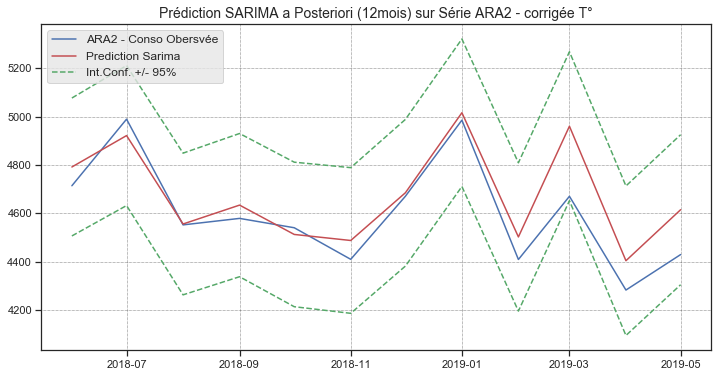

In [51]:
plt.figure(figsize=(12,6))
plt.plot(test, label='ARA2 - Conso Obersvée')
plt.plot(test.index, sar_pred, color='r', label='Prediction Sarima')
plt.plot(test.index, pred_l_train, color='g', linestyle='--', label="Int.Conf. +/- 95%")
plt.plot(test.index, pred_u_train, color='g', linestyle='--')

plt.legend(loc="upper left", bbox_to_anchor=(0, 1), facecolor="#E6E6E6", fontsize=12)
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.title("Prédiction SARIMA a Posteriori (12mois) sur Série ARA2 - corrigée T°", fontsize=14, y=1)
plt.savefig('OUTFILES/M4-Pred_Sarima_a_posteriori_zoom_ara2.png', dpi=100, bbox_inches='tight')
plt.show()

In [52]:
mape_sari=(np.abs(1-sar_pred/test['conso_ctp'])).mean()*100
rmse_sari = np.sqrt(((test['conso_ctp']-sar_pred)**2).mean())
print("RMSE Modele SARIMA : ", round(rmse_sari,2))
print("MAPE Modele SARIMA : ", round(mape_sari,2))
print("AIC  Modele SARIMA : ", round(sar_fit.aic,2))
print("BIC  Modele SARIMA : ", round(sar_fit.bic,2))

RMSE Modele SARIMA :  116.86
MAPE Modele SARIMA :  1.91
AIC  Modele SARIMA :  538.58
BIC  Modele SARIMA :  545.43


In [53]:
djutest = dju.iloc[-12:, :]
sarima_pred_ara0 = sar_pred + 𝛼*np.asarray(djutest['dju_value'])

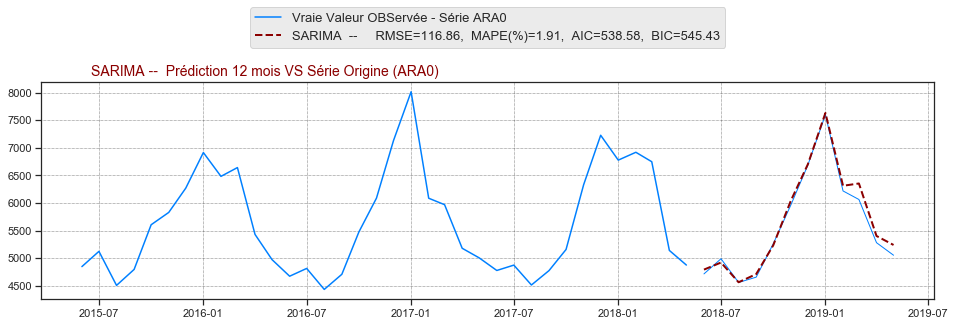

In [54]:
sns.set_style('ticks')
plt.figure(figsize=(16,4))
plt.plot(ara0[ara0.index.isin(train.index[-36:])], color='#0080FF', label="Vraie Valeur OBServée - Série ARA0")
plt.plot(ara0[ara0.index.isin(ara0.index[-12:])], color='#0080FF', linewidth=1)
plt.plot(test.index, sarima_pred_ara0, linestyle='--', color='darkred', linewidth=2,
         label="SARIMA  --     RMSE={:0.2f},  MAPE(%)={:0.2f},  AIC={:0.2f},  BIC={:0.2f}".
         format(rmse_sari, mape_sari, sar_fit.aic, sar_fit.bic))

plt.title("SARIMA --  Prédiction 12 mois VS Série Origine (ARA0)", fontsize=14, x=0.25, y=1, color="darkred")
plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.legend(loc="center", bbox_to_anchor=(0.5, 1.25), facecolor="#E6E6E6", fontsize=13)
plt.savefig('OUTFILES/M4-Pred_Sarima_a_posteriori.png', dpi=100, bbox_inches='tight')
plt.show()

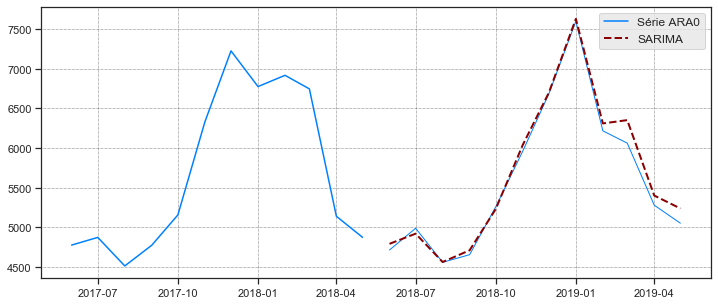

In [55]:
sns.set_style('ticks')
plt.figure(figsize=(12,5))
plt.plot(ara0[ara0.index.isin(train.index[-12:])], color='#0080FF', label="Série ARA0")
plt.plot(ara0[ara0.index.isin(ara0.index[-12:])], color='#0080FF', linewidth=1)
plt.plot(test.index, sarima_pred_ara0, linestyle='--', color='darkred', linewidth=2, label="SARIMA")

plt.grid(color="black", linestyle=':', linewidth=0.5)
plt.legend(loc="upper right", bbox_to_anchor=(1, 1), facecolor="#E6E6E6", fontsize=12)
plt.savefig('OUTFILES/M4-Pred_Sarima_a_posteriori_zoom_serie_ara0.png', dpi=100, bbox_inches='tight')
plt.show()

In [56]:
duree = round(time.time() - start_time, 5)
print("Durée du traitement :", "%s seconds" % duree)

Durée du traitement : 57.52516 seconds
